
# Finance Complaint Project
## Exploratory Data Analysis

### Problem Statement
The Consumer Financial Protection Bureau (CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a narrative of their dispute. 

This project made using Natural Language Processing (NLP) with machine learning models to process the issues text written in the complaint and other features in the dataset to predict if the customer will dispute or not.


*Industry use case:* An NLP + Machine learning model would make the classification of whether the consumer will dispute with the companty or not and thus helping the company to prioritize the complaint based on the prediction.


## Import

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
import os
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("display.max_columns", 50)

In [2]:
df = pd.read_csv("data/complaints.csv")

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-07-03,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IL,60160,NaN,NaN,Web,2024-07-03,In progress,Yes,NaN,9419821
1,2024-07-03,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IL,60626,NaN,NaN,Web,2024-07-03,In progress,Yes,NaN,9419624
2,2024-07-04,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,VA,23228,NaN,NaN,Web,2024-07-04,In progress,Yes,NaN,9422216
3,2024-07-04,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NE,68801,NaN,NaN,Web,2024-07-04,In progress,Yes,NaN,9422225
4,2024-07-04,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,CA,91789,NaN,NaN,Web,2024-07-04,In progress,Yes,NaN,9422229


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

*target: Consumer disputed?*

In [5]:
df["Consumer disputed?"].value_counts(normalize=True)*100

No     80.687894
Yes    19.312106
Name: Consumer disputed?, dtype: float64

In [6]:
df.shape

(5585491, 18)

In [10]:
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        740880
Consumer complaint narrative    3639944
Company public response         2884778
Company                               0
State                             46478
ZIP code                          30226
Tags                            5086244
Consumer consent provided?      1072644
Submitted via                         0
Date sent to company                  0
Company response to consumer         17
Timely response?                      0
Consumer disputed?              4817175
Complaint ID                          0
dtype: int64

In [11]:
df.replace('', np.nan, inplace=True)

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date received,5585491,4599,2024-06-13,9241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,5585491,21,"Credit reporting, credit repair services, or o...",2163873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-product,5350196,86,Credit reporting,3457073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue,5585485,178,Incorrect information on your report,1671998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-issue,4844611,272,Information belongs to someone else,1107538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumer complaint narrative,1945547,1553853,In accordance with the Fair Credit Reporting a...,9381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company public response,2700713,11,Company has responded to the consumer and the ...,2445853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,5585491,7289,"EQUIFAX, INC.",1191654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,5539013,63,FL,679476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP code,5555265,33783,XXXXX,125043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5585491 entries, 0 to 5585490
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 767.

## Exploring the Data

In [16]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"We have {len(numeric_features)} numeric features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 1 numeric features: ['Complaint ID']
We have 17 categorical features: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']


In [18]:
df.shape

(5585491, 18)

## Null Values per column

In [19]:
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
missing

,0
Tags,91.061717
Consumer disputed?,86.244432
Consumer complaint narrative,65.167843
Company public response,51.647707
Consumer consent provided?,19.204113
Sub-issue,13.264367
Sub-product,4.212611
State,0.832120
ZIP code,0.541152
Company response to consumer,0.000304


In [20]:
drop_columns = ["Tags", "Consumer complaint narrative", "Company public response", "Sub-issue", "Sub-product", "ZIP code", "Complaint ID"]
df.drop(drop_columns, axis=1, inplace=True)

Droping columns with a lof of missing values

Number of unique value for each column

In [21]:
for col in df.columns:
    print(col, df[col].nunique())

Date received 4599
Product 21
Issue 178
Company 7289
State 63
Consumer consent provided? 4
Submitted via 7
Date sent to company 4548
Company response to consumer 8
Timely response? 2
Consumer disputed? 2


## Visualization

### Visualizing target feature

In [22]:
df["Consumer disputed?"].unique()

array([nan, 'Yes', 'No'], dtype=object)

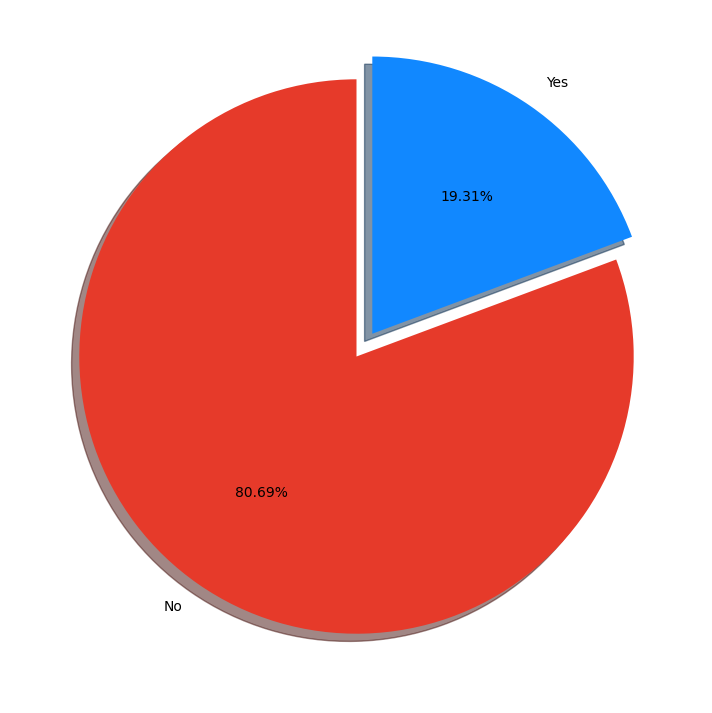

In [27]:
percentage = df["Consumer disputed?"].value_counts(normalize=True)*100
label = ['No', 'Yes']

fig, ax = plt.subplots(figsize=(15, 9))

explode = (0, 0.1)
colors = ['#e63a2a', '#1188ff' ]
ax.pie(percentage, labels=label, startangle=90,
       autopct='%1.2f%%', colors=colors, explode=explode,shadow=True)
plt.show()

*Obsevation:* From the char it is clear the dataset is not well balanced

### Products where complains are made

In [33]:
product_percentage = df["Product"].value_counts(normalize=True)*100

In [35]:
product_percentage.to_frame().head(10)

,Product
"Credit reporting, credit repair services, or other personal consumer reports",38.740963
Credit reporting or other personal consumer reports,23.646802
Debt collection,10.571998
Mortgage,7.179995
Checking or savings account,3.951201
Credit card or prepaid card,3.694805
Credit card,2.600183
Credit reporting,2.514175
Student loan,1.615418
Bank account or service,1.543374


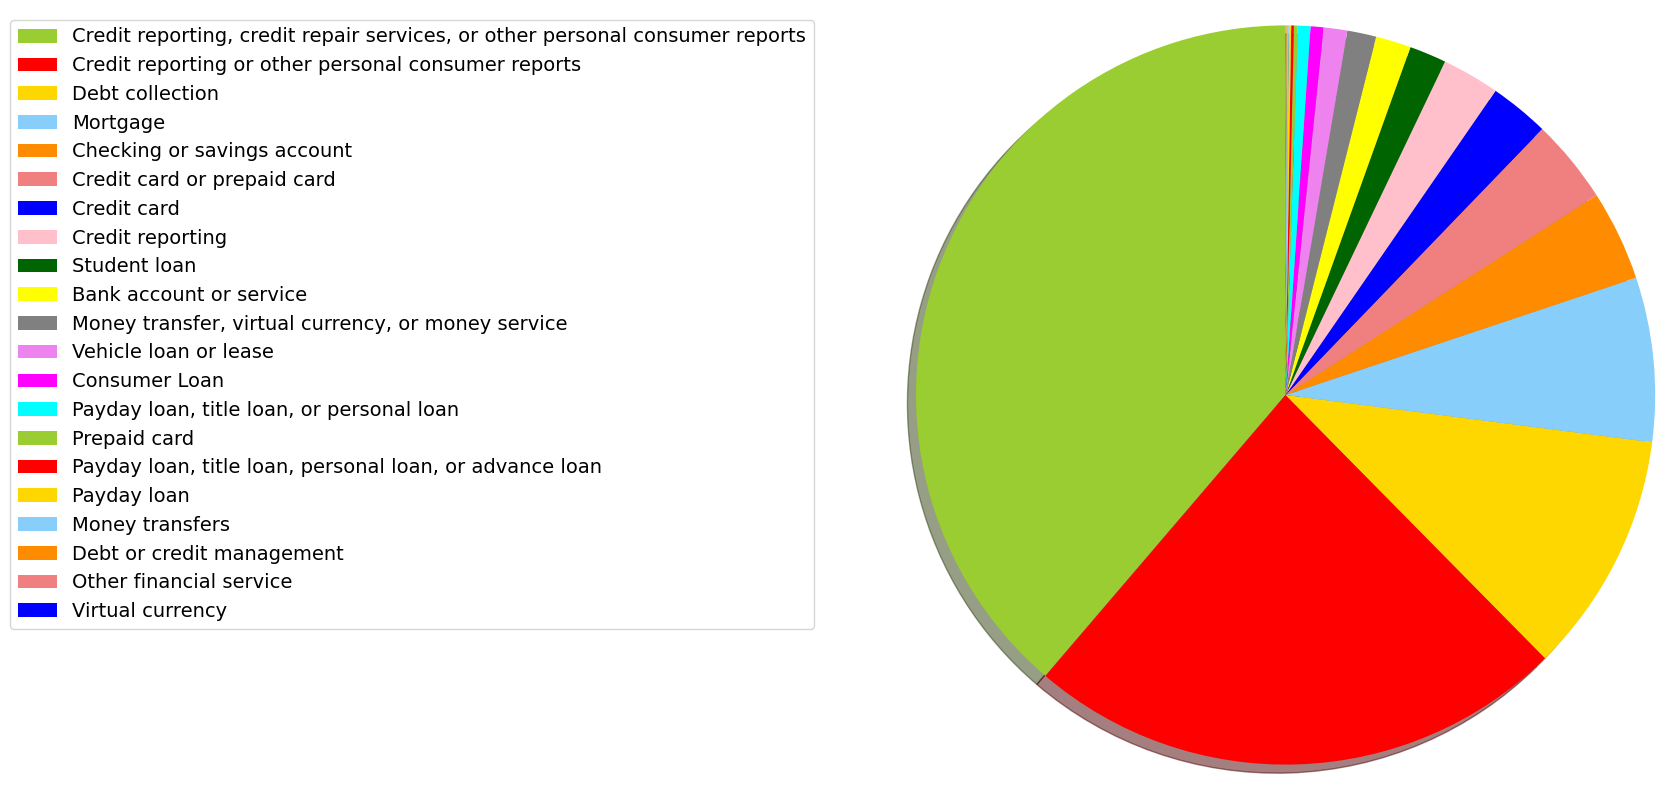

In [39]:
product_labels = product_percentage.index
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'darkorange', 'lightcoral', 'blue',
'pink', 'darkgreen', 'yellow', 'grey', 'violet', 'magenta', 'cyan']

fig, ax = plt.subplots(figsize=(18,10))
patches, texts = ax.pie(product_percentage, startangle=90,
                        shadow=True, colors=colors, radius=1.2)
plt.legend(patches, product_labels, loc='best', bbox_to_anchor=(-0.1, 1),
           fontsize=14)
plt.show()

### US states VS number of dispute

In [41]:
top_states = df["State"].value_counts(normalize=True)*100
top_states.to_frame().head(10)

,State
FL,12.267095
CA,11.402934
TX,10.934060
GA,6.964544
NY,6.479385
PA,4.780689
IL,4.244763
NJ,3.402899
NC,3.268777
MD,2.625143


<Axes: >

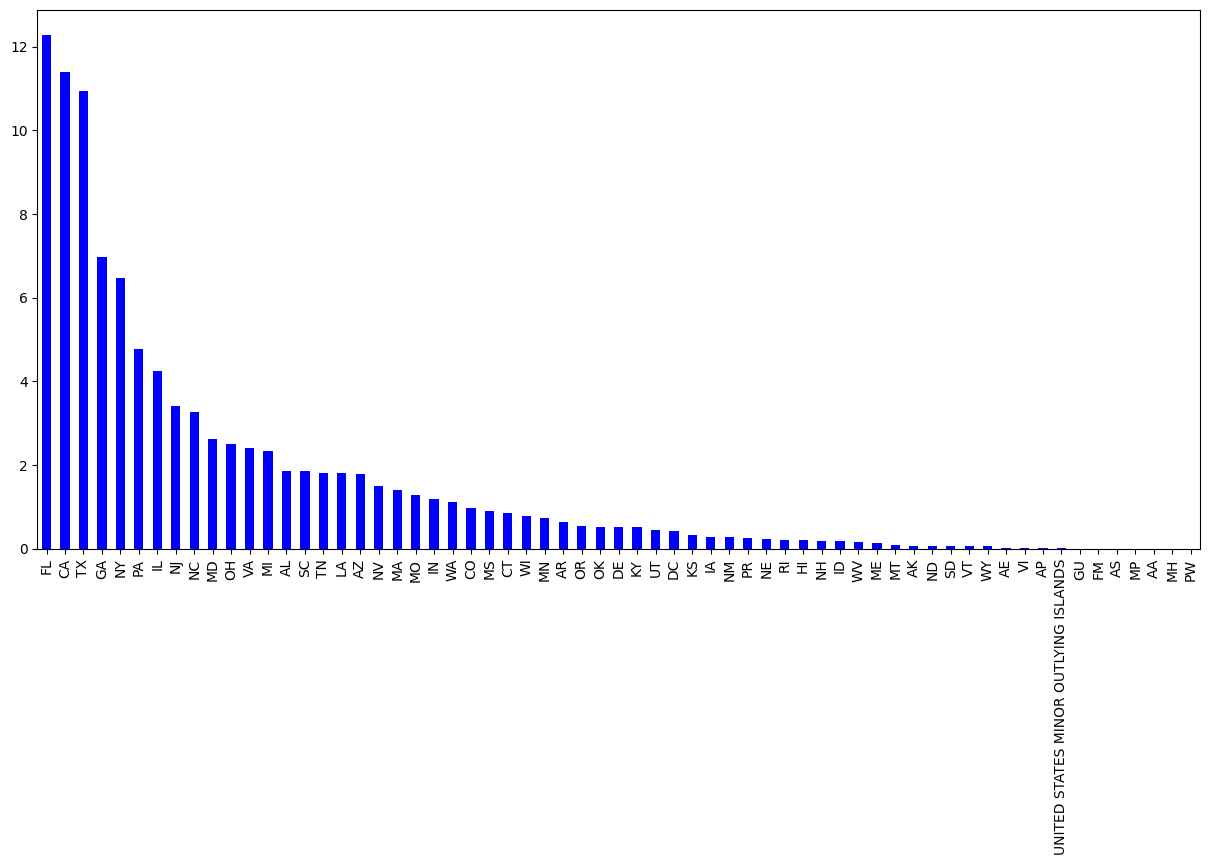

In [42]:
plt.subplots(figsize=(15,7))
top_states.plot(kind="bar", color="blue")

### Company response and impact on wether a dispute is filled

In [45]:
response = df.groupby("Company response to consumer")["Consumer disputed?"].value_counts(normalize=True)*100
response.to_frame()

Consumer disputed?
Company response to consumer    Consumer disputed?                    
Closed                          No                           79.416274
                                Yes                          20.583726
Closed with explanation         No                           78.771500
                                Yes                          21.228500
Closed with monetary relief     No                           89.415405
                                Yes                          10.584595
Closed with non-monetary relief No                           88.370777
                                Yes                          11.629223
Closed with relief              No                           86.651584
                                Yes                          13.348416
Closed without relief           No                           73.074771
                                Yes                          26.925229
Untimely response               No                           99.927061
                                Yes                           0.072939